## پ)

از آنجایی که تبدیل $UU^T$
تصویر کننده روی ابرر صفحه‌هایی از فضاست، پس به نوعی دو ابر صفحه خواهیم داشت که نقاط را بر اساس فاصله‌شان با این ابر صفحات، دسته‌بندی می‌کنیم۰

In [1]:
using LinearAlgebra, DelimitedFiles, Random, Plots

X = readdlm("./data/data3.txt")
sfl = shuffle(1:size(X)[1])
y = Int.(X[sfl, end])
X = X[sfl, 1:end-1]
R = randn((13, 100))
X = X * R

303×100 Array{Float64,2}:
  53.6139   -365.527  203.652  395.915  …     6.54962  -227.722   -4.14585
  43.2804   -377.122  258.578  456.675      -32.8682   -283.583   -9.22774
  66.9186   -261.68   306.547  397.413      -36.1503   -341.515  -20.0827
  85.9647   -320.33   320.716  473.143      -59.819    -332.952  -18.2173
 112.207    -242.153  257.892  382.832      -33.1629   -254.333  -14.4685
 103.133    -294.669  288.037  468.799  …   -87.6146   -263.159  -14.8147
  38.9605   -300.102  276.685  404.969      -50.6174   -295.449  -12.8449
  51.5049   -329.429  282.466  464.01       -59.2707   -286.559  -15.0903
 135.617    -260.6    257.958  371.191        6.04967  -263.25   -16.0055
  46.1102   -297.533  272.5    437.333      -82.149    -272.27   -13.5188
  65.1214   -344.213  189.188  383.316  …     1.73647  -197.824   -2.74255
  77.8961   -306.076  290.921  417.141      -20.1916   -317.162  -17.179
  45.2484   -324.713  231.674  413.437      -50.4773   -234.413   -8.37582
   ⋮     

In [2]:
function get_slice(arr, k, i)
    slr = zeros(Bool, (size(arr)[1]))
    slr[(size(arr)[1]÷k*(i-1)+1):(size(arr)[1]÷k*i)] .= 1
    return arr[slr, :], arr[(!).(slr), :]
end

X_test, X_train = get_slice(X, 5, 5)
y_test, y_train = get_slice(y, 5, 5)

([-1; -1; … ; -1; -1], [1; 1; … ; -1; 1])

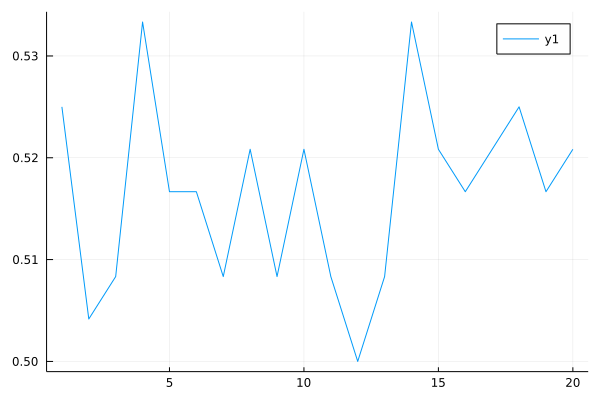

In [3]:
function my_model(X_tr, y_tr, X_vld, n = 10)
    n = min(n,size(X_tr)[2])
    msk = y_tr .== 1
    Xp, Xn = X_tr[msk, :], X_tr[(!).(msk), :]
    Up = eigvecs(Xp' * Xp)[:, 1:n]
    Up = Up * (Up')
    Un = eigvecs(Xn' * Xn)[:, 1:n]
    Un = Un * (Un')
    pred = ones(Int, size(X_vld)[1])
    for i = 1:size(X_vld)[1]
        x = X_vld[i, :]
        dp = norm(x - Up * x)
        dn = norm(x - Un * x)
        if dp > dn
            pred[i] = -1
        end
    end
    return pred
end

res = []
for i = 1:20
    accs = []
    for fi = 1:5
        X_vld, X_tr = get_slice(X_train, 5, fi)
        y_vld, y_tr = get_slice(y_train, 5, fi)
        y_vld, y_tr = vec(y_vld), vec(y_tr)

        ŷ_vld = my_model(X_tr, y_tr, X_vld, i)
        acc = count((ŷ_vld - y_vld) .== 0) / length(y_vld)

        push!(accs, acc)
    end
    push!(res, sum(accs) / 5)
end
plot(res)

In [4]:
n = argmin(res)
ŷ_test = my_model(X_train, vec(y_train), X_test, n)
acc = count((ŷ_test - y_test) .== 0) / length(y_test)
println("best n is $n")
println("Accuracy for test data is $acc")

best n is 12
Accuracy for test data is 0.6333333333333333
